In [10]:
import ete3
import random
import numpy as np

In [19]:
# np.random.randint((10,10))
data = [random.random() for i in range(20)]

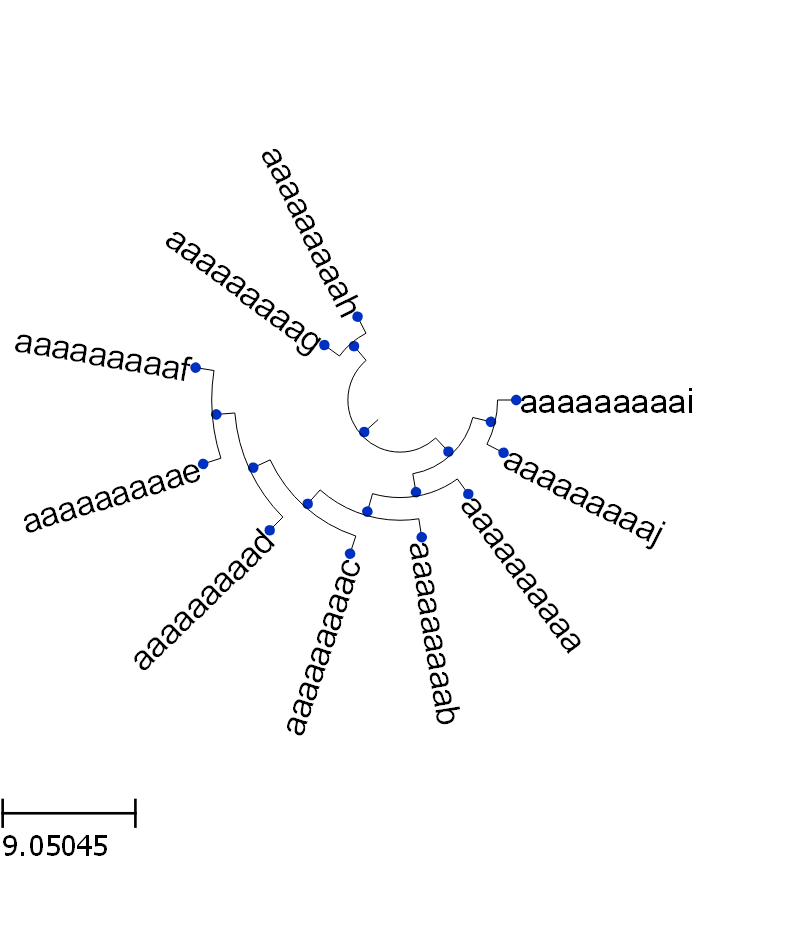

In [21]:
t = ete3.Tree()
t.populate(10)

ts = ete3.TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = 0 # 0 degrees = 3 o'clock
ts.arc_span = 270
# t.show(tree_style=ts)
t.render(file_name='%%inline', w=800, tree_style=ts)

---

In [ ]:
from scipy.cluster import hierarchy

def getNewick(node, newick, parentdist, leaf_names):
    
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        return newick

tree = hierarchy.to_tree(Z,False)
getNewick(tree, "", tree.dist, leaf_names)

In [17]:
import numpy as np
from string import ascii_lowercase
from scipy.cluster import hierarchy

def getNewick(node, newick, parentdist, leaf_names):
    
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        return newick
    
sample_set = np.random.random((10, 10))
leaf_names = list(ascii_lowercase)[:10]

Z = hierarchy.linkage(sample_set)
tree = hierarchy.to_tree(Z,False)

n_tree = getNewick(tree, "", tree.dist, leaf_names)

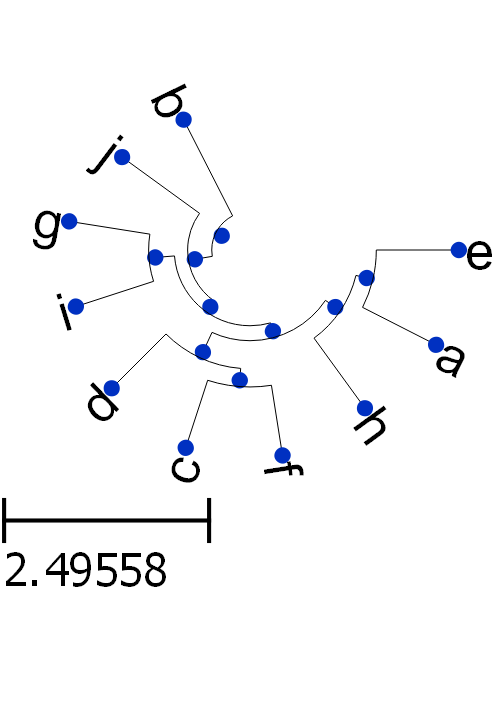

In [20]:
t = ete3.Tree(n_tree)
# t.populate(100)

ts = ete3.TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = 0 # 0 degrees = 3 o'clock
ts.arc_span = 270
# t.show(tree_style=ts)
t.render(file_name='%%inline', w=500, tree_style=ts)

---

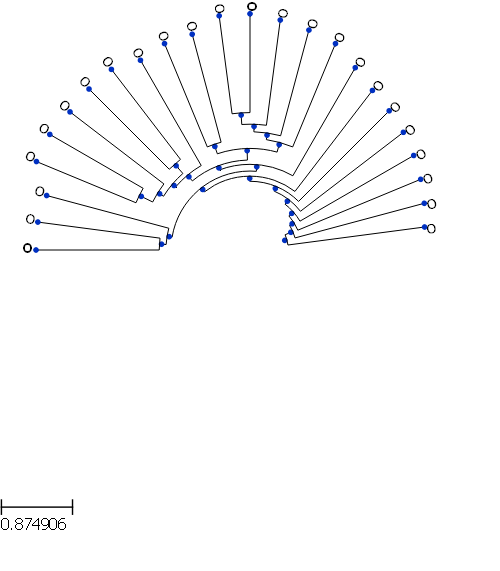

In [85]:
import ete3
import numpy as np
from string import ascii_lowercase
from scipy.cluster import hierarchy


def make_newick(node=None, newick=None, parent_dist=None, leaf_names=None):
    
    if newick is None:
        newick = ""
        
    if parent_dist is None:
        parent_dist = node.dist
    
    if leaf_names is None:
        leaf_names = list("o"*node.count)

    # If the node is a leaf format then return the result.
    if node.is_leaf():
        result = "{}:{:0.2f}{}".format(leaf_names[node.id], parent_dist - node.dist, newick)
        return result
    else:
        if len(newick) > 0:
            newick = "):{:0.2f}{}".format(parent_dist - node.dist, newick)
        
        # Close the newick tree.
        else:
            newick = ");"
        
        newick = make_newick(node=node.get_left(),
                             newick=newick,
                             parent_dist=node.dist,
                             leaf_names=leaf_names)
        
        newick = make_newick(node=node.get_right(),
                             newick=",{}".format(newick),
                             parent_dist=node.dist,
                             leaf_names=leaf_names)
        
        newick = "({}".format(newick)
        
        return newick


sample_set = np.random.random((24, 24))
# leaf_names = list(ascii_lowercase)
# leaf_names = list("o"*24)

Z = hierarchy.linkage(sample_set)
tree = hierarchy.to_tree(Z,False)

n_tree = make_newick(tree)


t = ete3.Tree(n_tree)
# t.populate(100)

ts = ete3.TreeStyle()
# ts.show_leaf_name = False
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
# t.show(tree_style=ts)
t.render(file_name='%%inline', w=500, tree_style=ts)

In [80]:
tree.count

24